Importing the latest data from https://github.com/CSSEGISandData/COVID-19

In [58]:
import pandas as pd

filenames = ['COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv','COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv','COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv']

dataframes = [pd.read_csv(f) for f in filenames]

print(dataframes)
confirmed_cases = pd.read_csv("COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")
deaths_cases = pd.read_csv("COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv")
recovery_cases = pd.read_csv("COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv")

[                        Province/State  Country/Region        Lat       Long  \
0                                  NaN     Afghanistan  33.000000  65.000000   
1                                  NaN         Albania  41.153300  20.168300   
2                                  NaN         Algeria  28.033900   1.659600   
3                                  NaN         Andorra  42.506300   1.521800   
4                                  NaN          Angola -11.202700  17.873900   
..                                 ...             ...        ...        ...   
254                                NaN         Burundi  -3.373100  29.918900   
255                                NaN    Sierra Leone   8.460555 -11.779889   
256   Bonaire, Sint Eustatius and Saba     Netherlands  12.178400 -68.238500   
257                                NaN          Malawi -13.254308  34.301525   
258  Falkland Islands (Islas Malvinas)  United Kingdom -51.796300 -59.523600   

     1/22/20  1/23/20  1/24/20  1/25/2

In [59]:
confirmed_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,94,110,110,120,170,174,237,273,281,299
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,174,186,197,212,223,243,259,277,304,333
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,367,409,454,511,584,716,847,986,1171,1251
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,224,267,308,334,370,376,390,428,439,466
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,4,4,5,7,7,7,8,8,8,10


In [60]:
deaths_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,4,4,4,4,4,4,4,6,6,7
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,6,8,10,10,11,15,15,16,17,20
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,25,26,29,31,35,44,58,86,105,130
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,3,3,3,6,8,12,14,15,16,17
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,0,0,0,2,2,2,2,2,2,2


In [61]:
recovery_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,2,2,2,2,2,5,5,10,10,10
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,17,31,31,33,44,52,67,76,89,99
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,29,29,31,31,37,46,61,61,62,90
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,1,1,1,1,10,10,10,10,16,21
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,0,0,0,0,0,1,1,1,1,2


Cleaning data

In [62]:
confirmed_cases_ke = confirmed_cases.groupby('Country/Region').sum().loc['Kenya'][3:]
confirmed_cases_ke.tail()

3/31/20     59.0
4/1/20      81.0
4/2/20     110.0
4/3/20     122.0
4/4/20     126.0
Name: Kenya, dtype: float64

In [63]:
death_cases_ke = deaths_cases.groupby('Country/Region').sum().loc['Kenya'][3:]
death_cases_ke.tail()

3/31/20    1.0
4/1/20     1.0
4/2/20     3.0
4/3/20     4.0
4/4/20     4.0
Name: Kenya, dtype: float64

In [64]:
recovery_cases_ke = recovery_cases.groupby('Country/Region').sum().loc['Kenya'][3:]
recovery_cases_ke.tail()

3/31/20    1.0
4/1/20     3.0
4/2/20     4.0
4/3/20     4.0
4/4/20     4.0
Name: Kenya, dtype: float64

Plotting the data

Text(0.5, 0, 'Time period (days)')

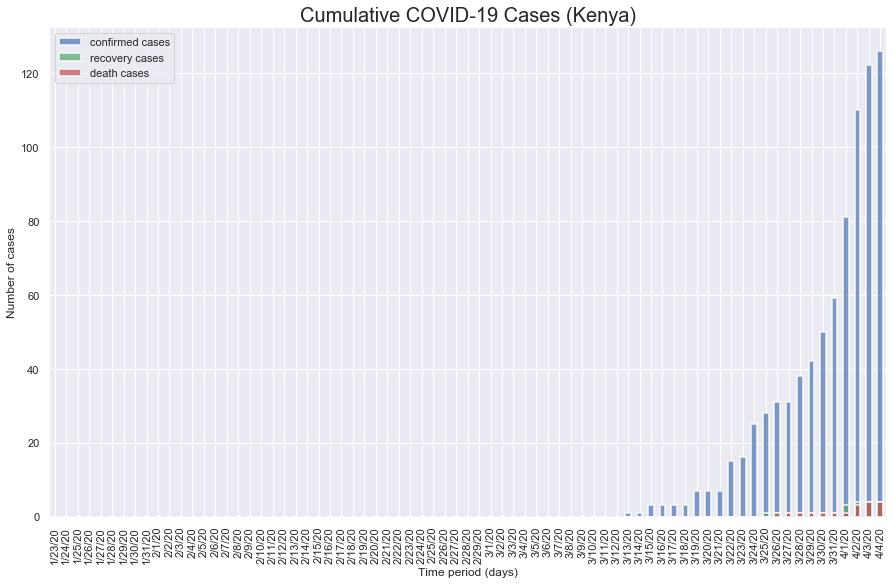

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()

plt.figure(figsize=(15,9))

confirmed_cases_ke.plot.bar(linewidth=2, label='confirmed cases', color='b', alpha=0.7)
recovery_cases_ke.plot.bar(linewidth=2, label='recovery cases', color='g', alpha=0.7)
death_cases_ke.plot.bar(linewidth=2, label='death cases', color='r', alpha=0.7)

plt.legend()
plt.title("Cumulative COVID-19 Cases (Kenya)",fontsize=20)
plt.ylabel('Number of cases')
plt.xlabel('Time period (days)')

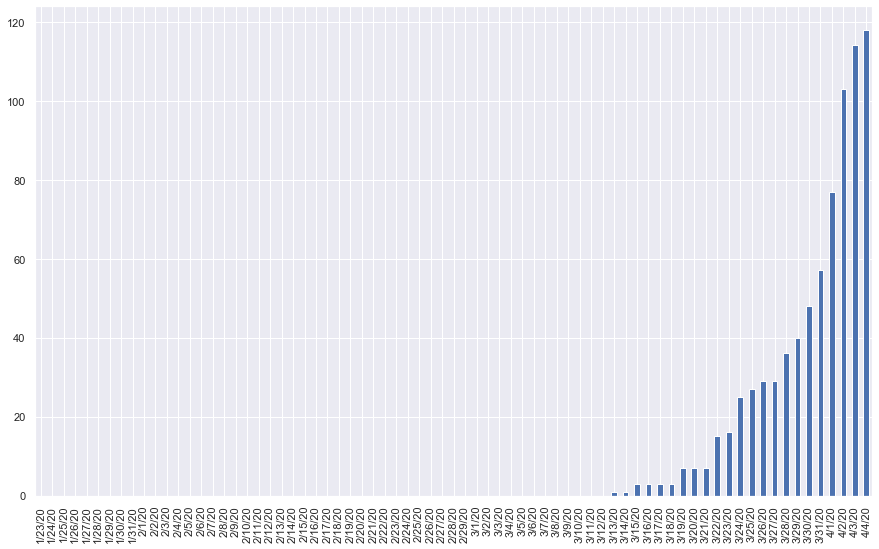

In [66]:
active_cases_ke = confirmed_cases_ke - recovery_cases_ke - death_cases_ke
plt.figure(figsize=(15,9))
active_cases_ke.plot.bar()